# SMAI Assignment - 2

## Question - `1` : Clustering

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

**Part 1:** 

Use the **Fashion-MNIST** dataset for this question.

**About the dataset:**
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image. You can check out the dataset here: https://www.kaggle.com/datasets/zalando-research/fashionmnist

1a) Load the dataset and use the K Means algorithm **(You are allowed to use the library)**. You need to find the optimal number of clusters using the
> i) elbow method
    >> Plot the graph between average distance and the number of clusters graph while using the elbow method. Report the optimal number of clusters found. Implement this method on your own.

> ii) silhoette method
    >> Plot the graph between silhoutte score and number of clusters using silhoette method. Report the optimal number of clusters found. You can use the functions provided by sklearn.metrics.

1b) Experiment with different cluster initialisation methods [k-means++, forgy ("random" in sklearn)]. (init parameter in KMeans class) 


1c) Visualize the dataset to depict the clusters formed. Here you can leverage methods like PCA to reduce the data to 2-3 dimensions and visualize using scatter plots. Color the points according to the clusters (you can use T-SNE or any other matplotlib method)

</br>
</br>
</br>
</br>


**Part 2:**
</br>
In this task, you need to implement Hierarchical clustering (agglomerative) on the same dataset.

2a) visualize a dendogram and find out the optimal number of clusters with the help of Dendogram. Explain the procedure.


2b) Implement Hierarchical clustering using: </br>
> i) single linkage

> ii) Complete linkage

Visualize the clusters obtained using these linkages and compare. 

</br>
</br>
</br>
</br>

**Part 3:**
</br>
In this part, we’ll implement kmeans to compress an image. In an original image each pixel has 3 8-bit integers, therefore the size of the image is **3 x height x width x 8**. Our task is to compress the image where it only comprises of **k** unique colors, where k = number of clusters formed by the algorithm where each pixel is a 3D datapoint. Therefore the new compressed image can be stored in **k x 24 + width x height x b**. (b -> number of bits used to represent the integer *k*, since each pixel will have a color value from 0 to k-1). Now your task is to experiment with different values of k (atleast 3) and show the compressed image along with the value of data reduction (in terms of bits). 

(an example image has been provided in the folder)

## Part1: K Means

In [17]:
# LOADING THE DATASET. Take only the test split (10000 samples)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score


In [2]:
# implement elbow method from scratch
def elbow(X):
    # Calculate inertias for each k value
    inertias = []
    for k in range(2,21):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia = kmeans.inertia_
        inertias.append(inertia)
    
    plt.plot(range(2,21),inertias,'bx-')
    plt.title("Elbow Analysis")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.show()

In [3]:
# implement silhouette method from scratch
def silhouette(X):
    silhouette_scores = []
    for k in range(2,21):
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(X)
    
        silhouette = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette)
    plt.plot(range(2,21), silhouette_scores, 'bx-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.title('Silhouette Method for Fashion-MNIST Dataset')
    plt.show()

In [4]:
# load the dataset using pandas
df = pd.read_csv('fashion-mnist_test.csv')
testX = df.iloc[:, 1:].values
testy = df.iloc[:, 0].values

df = pd.read_csv('fashion-mnist_train.csv')
trainX = df.iloc[:, 1:].values
trainy = df.iloc[:, 0].values

X = testX.reshape(testX.shape[0], -1)
y = np.copy(testy)
print("10K images flattened: ", X.shape, " and 10k labels: ", y.shape)

10K images flattened:  (10000, 784)  and 10k labels:  (10000,)


In [5]:
trainX = trainX.reshape([60000, 784])
testX = testX.reshape([10000, 784])

## 1.a

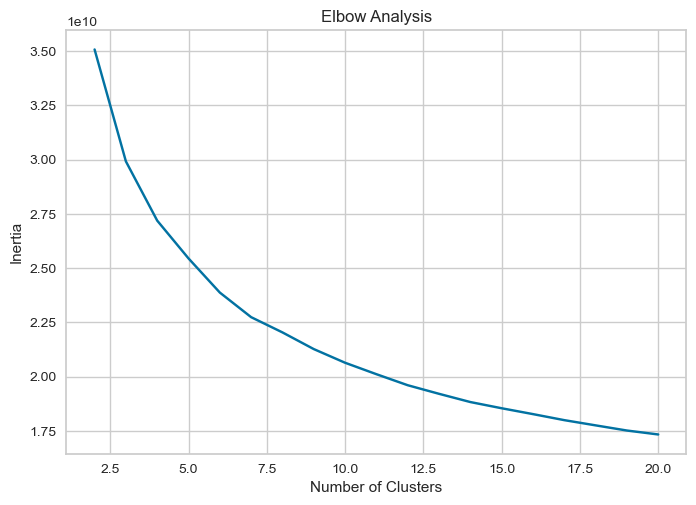

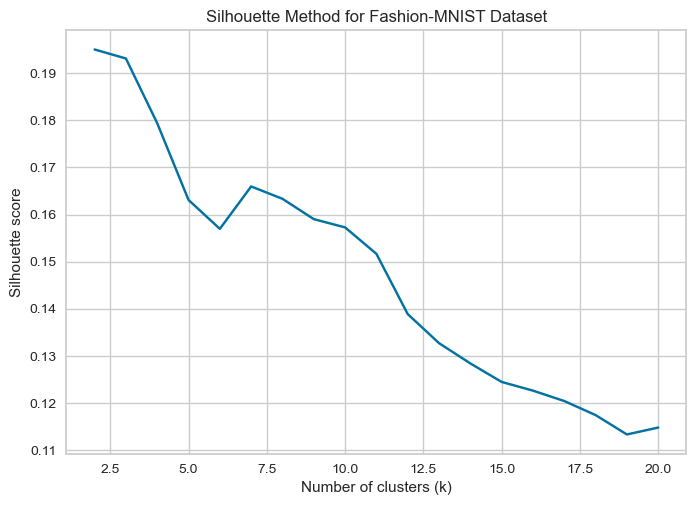

In [6]:
elbow(testX)
silhouette(testX)


## 1.b

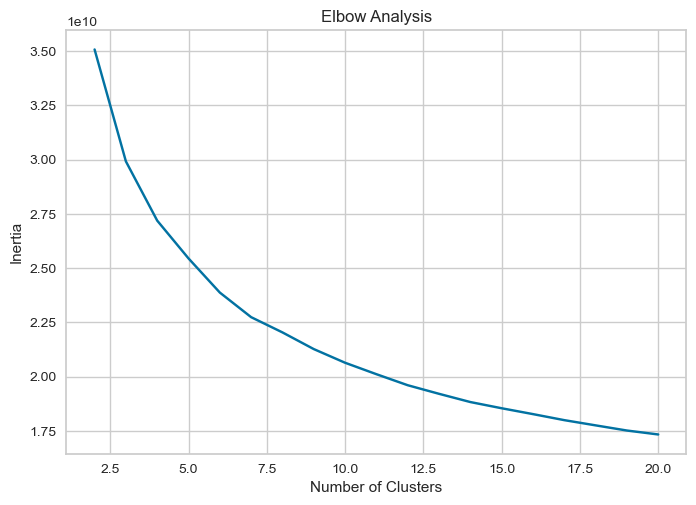

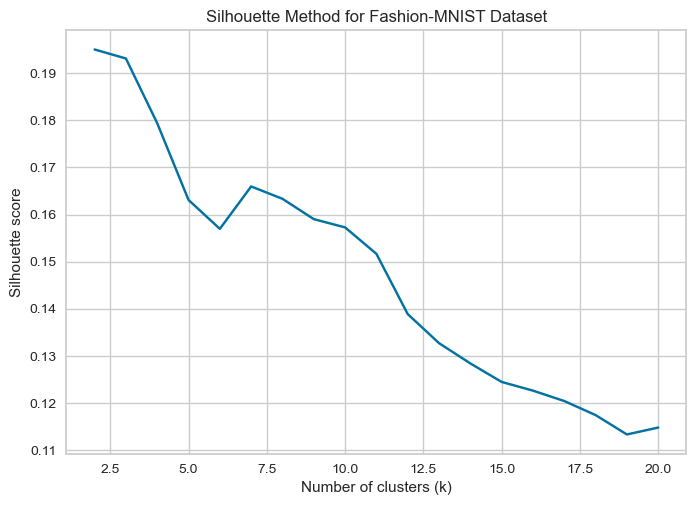

In [7]:
inertias__ = []
for k in range(2,21):
    kmeans = KMeans(n_clusters=k, init = 'k-means++',random_state=42)
    kmeans.fit(X)
    inertia = kmeans.inertia_
    inertias__.append(inertia)
    
plt.plot(range(2,21),inertias__,'bx-')
plt.title("Elbow Analysis for KM++")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()    

silho = []
for k in range(2,21):
    kmeans = KMeans(n_clusters=k, init = 'k-means++',random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    
    silhouette = silhouette_score(X, cluster_labels)
    silho.append(silhouette)
    
plt.plot(range(2,21), silho, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method for Fashion-MNIST Dataset for KM++')
plt.show()

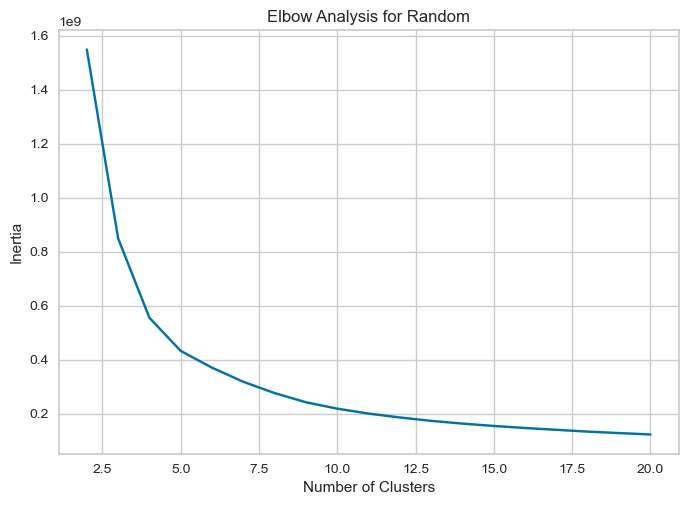

In [39]:
inertias__ = []
for k in range(2,21):
    kmeans = KMeans(n_clusters=k, init = 'random',random_state=42)
    kmeans.fit(X)
    inertia = kmeans.inertia_
    inertias__.append(inertia)
    
plt.plot(range(2,21),inertias__,'bx-')
plt.title("Elbow Analysis for Random")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()    

silho = []
for k in range(2,21):
    kmeans = KMeans(n_clusters=k, init = 'random',random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    
    silhouette = silhouette_score(X, cluster_labels)
    silho.append(silhouette)
    
plt.plot(range(2,21), silho, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method for Fashion-MNIST Dataset for Random')
plt.show()

## 1.c

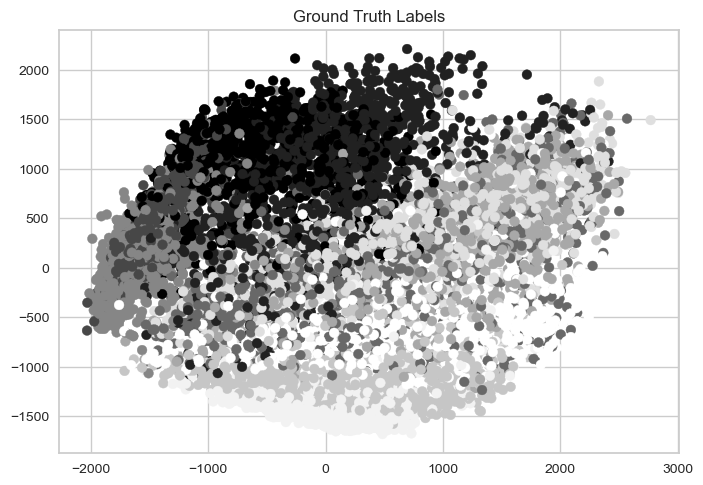

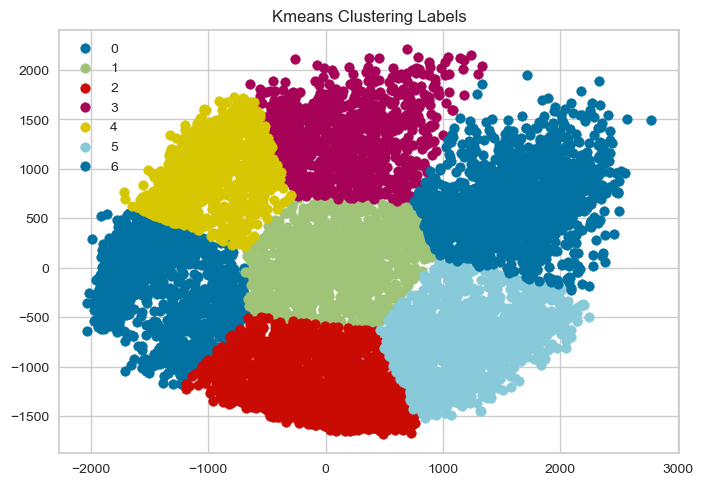

In [8]:
# Visualize the clusters formed by Kmeans (Use PCA to reduce dimensions and plot scatter plot. You can show the original ground truth labels in one plot and then the predicted clusters in another plot)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
red = pca.fit_transform(testX)

kmeans = KMeans(n_clusters=7)
label = kmeans.fit_predict(red)

u_labels = np.unique(label)
 
# plot ground truth labels
plt.scatter(red[:,0],red[:,1],c = testy)
plt.title("Ground Truth Labels")
plt.show()

#plotting the results:
for i in u_labels:
    plt.scatter(red[label == i , 0] , red[label == i , 1] , label = i)
plt.legend()
plt.title("Kmeans Clustering Labels")
plt.show()


## Part2: Hierarchical clustering

In [9]:
# implement hierarchical clustering ( you can use scikit module)
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [10]:
def hierarchical_clustering(X, link):
    # create clusters
    hc = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage = link)
    y_hc = hc.fit_predict(X)

        #plotting the results:
    for i in u_labels:
        plt.scatter(X[y_hc == i , 0] , X[y_hc == i , 1] , label = i)
    plt.legend()
    plt.title("Hierarchical Clustering Labels")
    plt.show()
    return y_hc

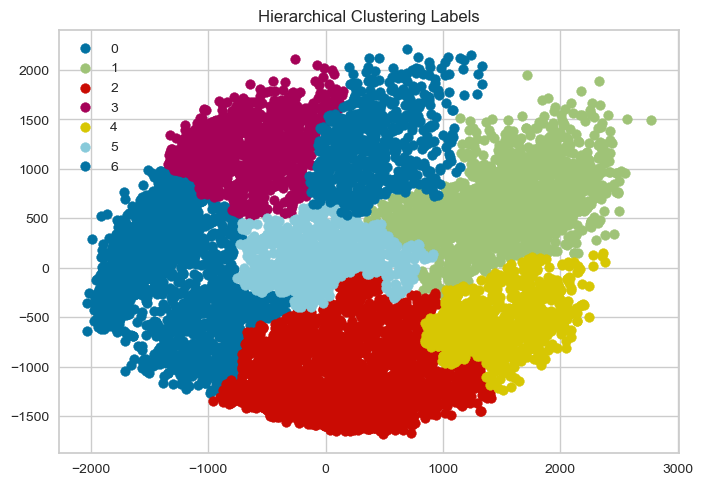

In [11]:
y_hc = hierarchical_clustering(red, 'ward')
# plot ground truth labels

## 2.a

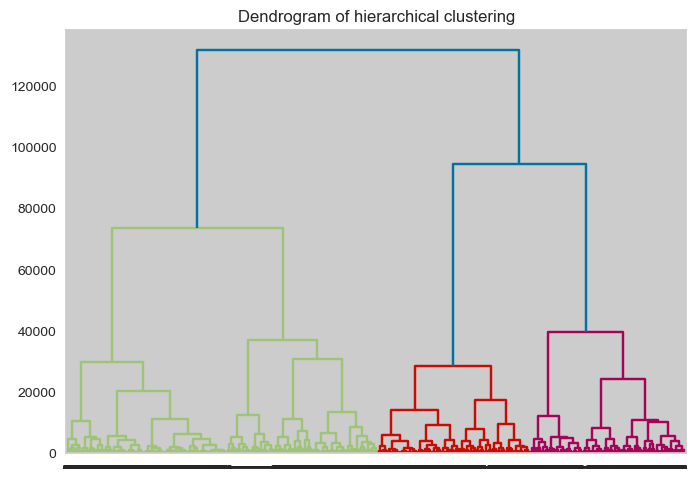

In [16]:
# visualize a dendogram
from scipy.cluster.hierarchy import dendrogram, linkage

def dendogram(X):
  linkage_mat = linkage(X,method = 'ward')
  dendrogram(linkage_mat,labels = label)
  plt.title("Dendrogram of hierarchical clustering")
  plt.show()

dendogram(red)

**Question**: Explain the procedure to find the optimal number of clusters using dendogram

Answer: </br>
</br>
</br>
</br>





## 2.b

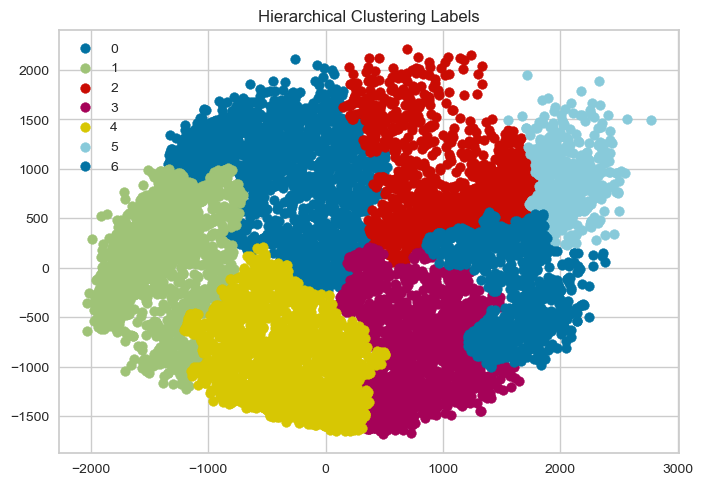

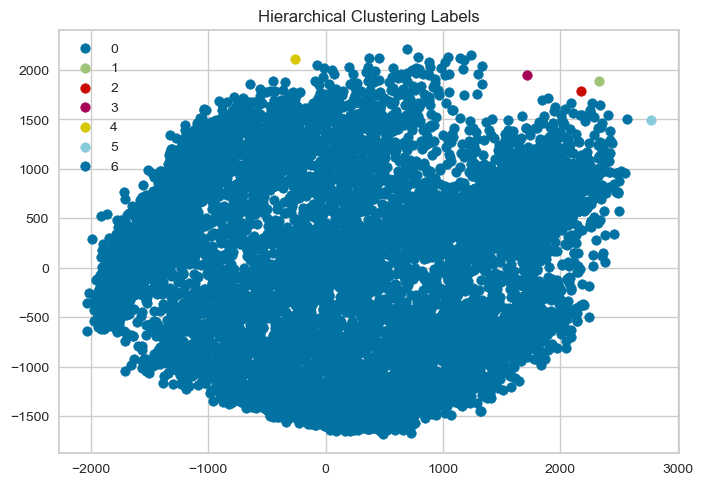

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
# visualisation of clusters using single linkage and complete linkage
hierarchical_clustering(red, 'complete')
hierarchical_clustering(red, 'single')

**Question:** Mention the differences observed using single and complete linkage:

Answer: </br>
</br>
</br>
</br>

## Part3: Image Compression

Image size:  (635, 640, 3)
X size:  (406400, 3)


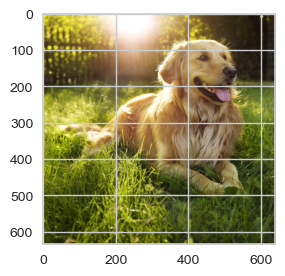

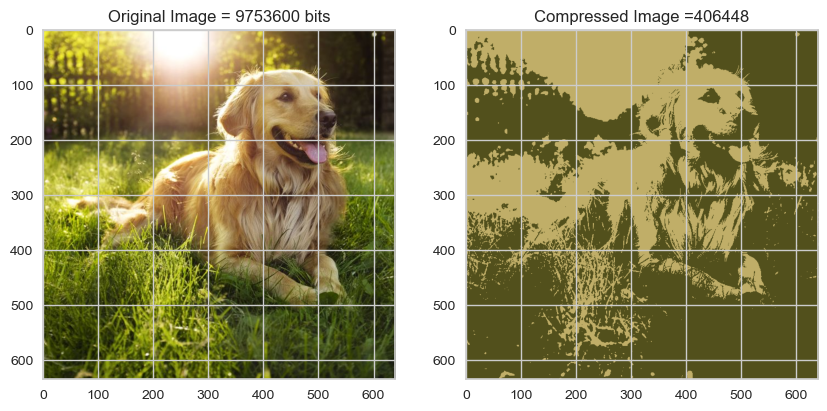

Compression ratio:  23.99716568909184


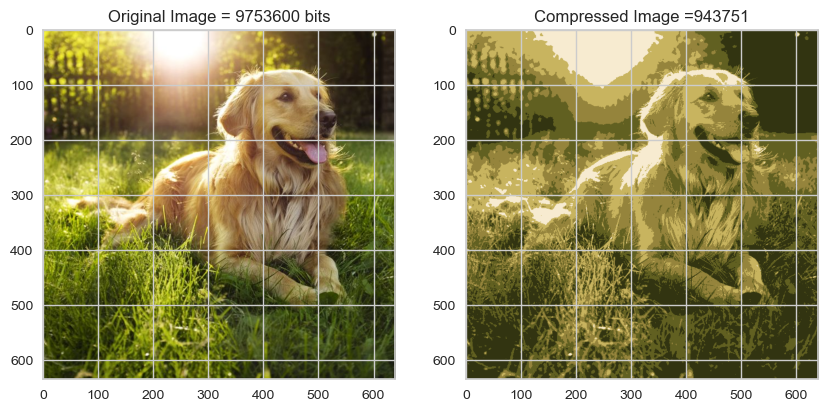

Compression ratio:  10.334929446432374


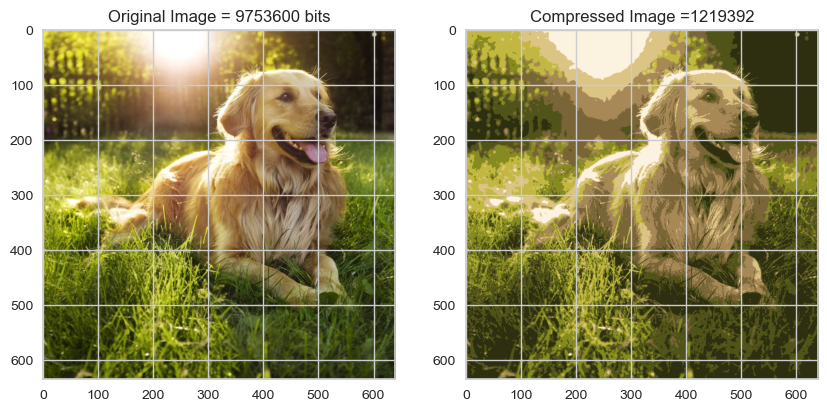

Compression ratio:  7.998740355849472


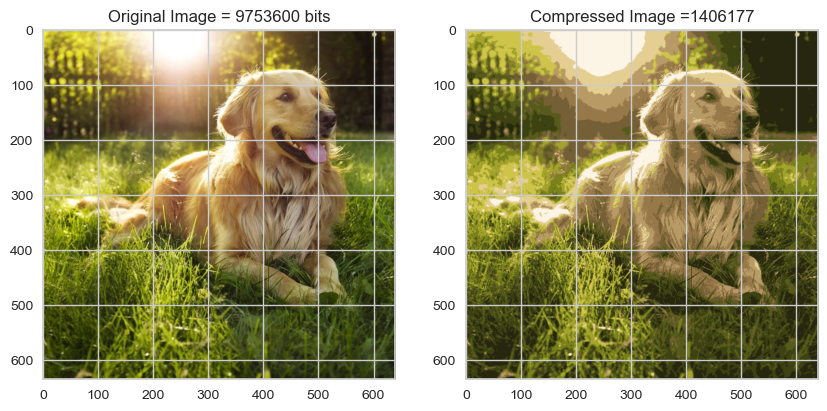

Compression ratio:  6.936253401954377


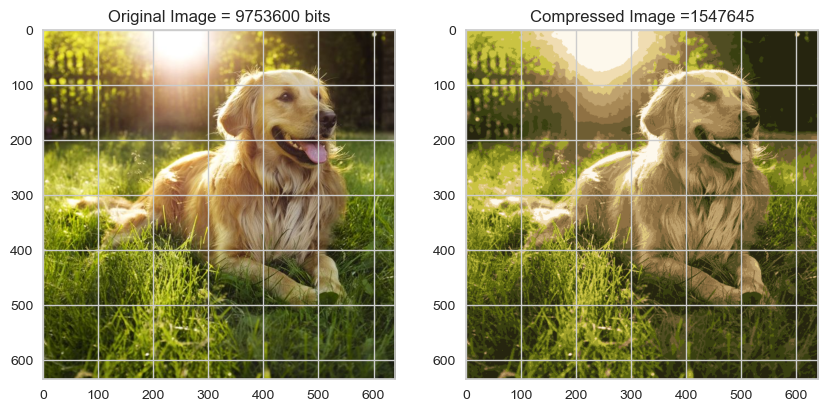

Compression ratio:  6.302220470456726


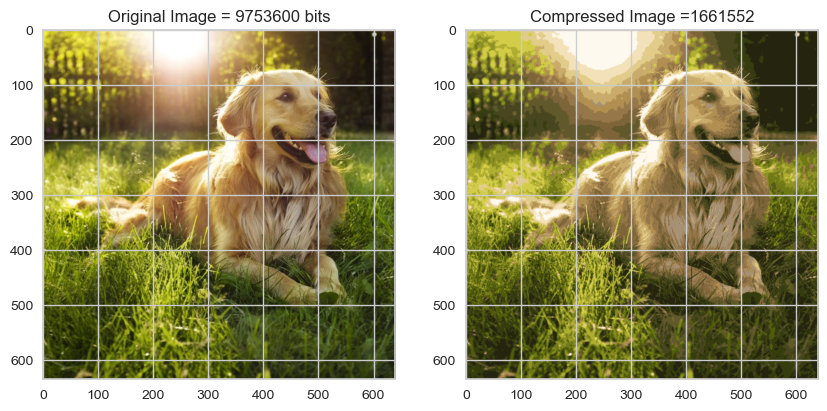

Compression ratio:  5.870174391171627


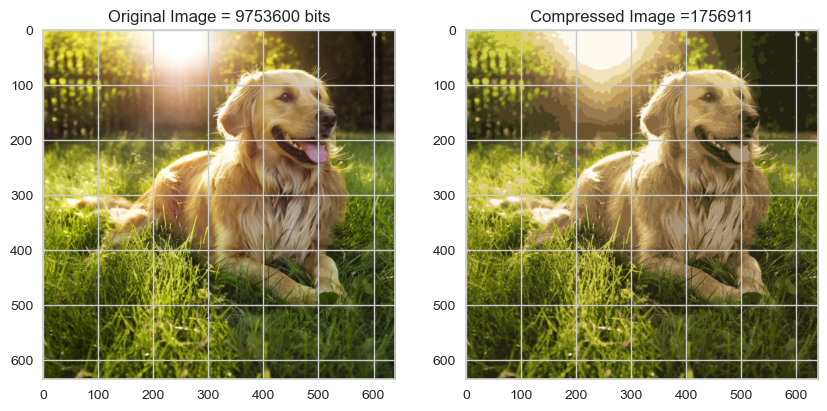

Compression ratio:  5.551561803642871


In [38]:
# Boiler plate code to load the image
import cv2
import matplotlib.pyplot as plt
import os 
import numpy as np
img = cv2.imread('dog.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# cv2_imshow(img)
img_size = img.shape

# Reshape it to be 2-dimension
X = img.reshape(img_size[0] * img_size[1], img_size[2])

print("Image size: ", img_size)
print("X size: ", X.shape)

# show the image
plt.figure(figsize=(3, 3))
plt.imshow(img)
plt.show()

for k in range(2,21,3):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    compressed_img = kmeans.cluster_centers_[kmeans.labels_]
    compressed_img = compressed_img.reshape(img_size[0], img_size[1], 3)
    size = img_size[0]*img_size[1]*np.log2(k) + k*3*8
    # Convert the compressed image to uint8 data type
    compressed_img = np.uint8(compressed_img)

    # Plot the original and compressed images side by side
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(img)
    ax[0].set_title('Original Image = ' + str(int(img_size[0]*img_size[1]*8*3)) + ' bits')
    ax[1].imshow(compressed_img)
    ax[1].set_title('Compressed Image =' + str(int(size)))
    plt.show()
    print("Compression ratio: ", int(img_size[0]*img_size[1]*8*3)/int(size))